#  Bridging the Education Gap

## Objective
The project focuses on identifying gaps in education access, infrastructure, and resources in underserved communities, to foster community engagement and improve education quality and inclusivity.

## Datasets Overview
We will analyze 8 datasets with headers such as demographic information, school types, learner enrollment, teaching staff data, and infrastructure data. The analysis will identify patterns, disparities, and areas of improvement, ensuring actionable recommendations.

***Utilize the provided datasets:***

- `Demographic Data`: Regional and community details.
- `Age Category Data`: Age distribution of learners.
- `Type of Schools`: Types of schools (e.g., nomadic, special needs).
- `Enrollment Data`: Student enrollment by region and school type.
- `Teacher Data`: Availability and qualifications of teaching staff.
- `Infrastructure Data`: Information on classrooms, libraries, and other resources.
- `Learner Resources Data`: Availability of textbooks and materials.


### Key Questions to Address:

- Which regions have the most significant education gaps in terms of enrollment, resources, or infrastructure?
- How does the availability of qualified teachers vary across regions?
- What types of schools (e.g., special needs, nomadic) are underrepresented in underserved communities?
- Are there infrastructure challenges (e.g., insufficient classrooms or poor facilities) that hinder quality education?
- What role does community engagement play in addressing these gaps?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pickle
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score


sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Load datasets
demographic_data = pd.read_excel('New DATA SHEETS.xlsx', 'Demographic Data')
agecategory_data = pd.read_excel('New DATA SHEETS.xlsx', 'Age Category')
typeofsch_data = pd.read_excel('New DATA SHEETS.xlsx', 'Type Of Schools(sub-schools)')
enrolment_data = pd.read_excel('New DATA SHEETS.xlsx', 'Learners Enrolment ')
teacher_data = pd.read_excel('New DATA SHEETS.xlsx', 'Teaching Staff Data')
teacherspecial_data = pd.read_excel('New DATA SHEETS.xlsx', 'Teaching Staff In Special Prog')
infrastructure_data = pd.read_excel('New DATA SHEETS.xlsx', 'Infrastructure Data')
leanresource_data = pd.read_excel('New DATA SHEETS.xlsx', 'Learners Resources')

In [3]:
demographic_data.head(2)

,Demographic information,Sub-Schools,Male,Female,Total,North Central,North East,North West,South East,South South,South West
0,Age 0 - 2,ECCDE/Pre-Primary,1.019805e+07,9.416753e+06,1.961480e+07,2.848128e+06,2.682823e+06,4.897113e+06,2.313476e+06,2.809582e+06,4.063681e+06
1,Age 3,ECCDE/Pre-Primary,2.968089e+06,2.983723e+06,5.951812e+06,1.101353e+06,9.368663e+05,1.440507e+06,5.775644e+05,9.667335e+05,9.287872e+05


In [4]:
agecategory_data.head(2)

,Demographic information,Sub-Schools
0,Age 0 - 2,ECCDE/Pre-Primary
1,Age 3,ECCDE/Pre-Primary


In [5]:
typeofsch_data.head(2)

,Sub-Schools,Type of Schools,Total,North Central,North East,North West,South East,South South,South West
0,ECCDE/Pre-Primary,Conventional,45878,8319,2149,3162,5848,7848,18552
1,ECCDE/Pre-Primary,Special Needs,241,53,40,29,22,45,52


In [6]:
enrolment_data.head(2)

,Sub-Schools,Type of Schools,Male,Female,Total,North Central,North East,North West,South East,South South,South West
0,ECCDE/Pre-Primary,Conventional,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,1672971
1,ECCDE/Pre-Primary,Islamiyya,208841,303708,512549,35218,59008,392937,240,518,24628


In [7]:
teacher_data.head(2)

,Sub-Schools,Teaching Staff,Male,Female,Total,North Central,North East,North West,South East,South South,South West
0,ECCDE/Pre-Primary,Teachers in ECCDE/Pre-Primary Schools,13637,140580,154217,27303,9572,18532,25229,29290,44291
1,ECCDE/Pre-Primary,Qualified teachers in ECCDE/Pre-Primary Schools,6633,81853,88486,17001,5475,11015,14903,16668,23424


In [8]:
teacherspecial_data.head(2)

,Type of Schools,Teaching Staff In Special Programmes,Male,Female,Total,North Central,North East,North West,South East,South South,South West
0,Special Needs,Teaching Staff In Special Needs,3257,3763,7020,1422,1243,1948,492,657,1258
1,Nomadic,Teaching Staff In Nomadic,7124,2495,9619,2083,2219,3837,275,290,915


In [9]:
infrastructure_data.head(2)

,Sub-Schools,School Facilities,Total,North Central,North East,North West,South East,South South,South West
0,ECCDE/Pre-Primary,Classrooms in ECCDE/Pre-Primary,265841,41162,14897,31949,42714,48937,86182
1,ECCDE/Pre-Primary,Good Classrooms in ECCDE/Pre-Primary,213211,33542,10851,23087,30637,38653,76441


In [10]:
leanresource_data.head(2)

,Sub-Schools,Learners Textbooks,Total,North Central,North East,North West,South East,South South,South West
0,ECCDE/Pre-Primary,English,706439,102174,48697,144338,86791,105649,218790
1,ECCDE/Pre-Primary,Mathematics,596868,84461,43911,120245,72542,93218,182491


### Check for missing values

In [11]:
agecategory_data.isnull().sum()

Demographic information    0
Sub-Schools                0
dtype: int64

In [12]:
typeofsch_data.isnull().sum()

Sub-Schools        0
Type of Schools    0
Total              0
North Central      0
North East         0
North West         0
South East         0
South South        0
South West         0
dtype: int64

In [13]:
enrolment_data.isnull().sum()

Sub-Schools        0
Type of Schools    0
Male               0
Female             0
Total              0
North Central      0
North East         0
North West         0
South East         0
South South        0
South West         0
dtype: int64

In [14]:
teacher_data.isnull().sum()

Sub-Schools       0
Teaching Staff    0
Male              0
Female            0
Total             0
North Central     0
North East        0
North West        0
South East        0
South South       0
South West        0
dtype: int64

In [15]:
teacherspecial_data.isnull().sum()

Type of Schools                         0
Teaching Staff In Special Programmes    0
Male                                    0
Female                                  0
Total                                   0
North Central                           0
North East                              0
North West                              0
South East                              0
South South                             0
South West                              0
dtype: int64

In [16]:
infrastructure_data.isnull().sum()

Sub-Schools          7
School Facilities    0
Total                0
North Central        0
North East           0
North West           0
South East           0
South South          0
South West           0
dtype: int64

In [17]:
leanresource_data.isnull().sum()

Sub-Schools           0
Learners Textbooks    0
Total                 0
North Central         0
North East            0
North West            0
South East            0
South South           0
South West            0
dtype: int64

### Exploratory Data Analysis (EDA) on Individual Datasets

In [18]:
# Infrastructure Availability
#sns.heatmap(merged[['Classrooms', 'Libraries', 'Laboratories']].corr(), annot=True, cmap='coolwarm')
#plt.title('Infrastructure Correlation Matrix')
#plt.show()

In [19]:
# Dropout Distribution
#sns.histplot(merged['Dropout_Rate'], bins=20, kde=True)
#plt.title('Distribution of Dropout Rates')
#plt.show()

***Key Observations***

- Identify regions with low enrollment and poor infrastructure.
- Highlight teacher shortages in specific areas.
- Note correlations between dropout rates and lack of infrastructure or teacher qualifications.

Using the following to create the best prediction: 
- We can use the Learner’s Enrollment, Demographic data and also Type of schools to predict drop out rate for different regions and their age category. Also, factors contributing like lack of qualified teachers, lack of infrastructure: good classrooms, libraries etc.

- Also, we can use Learners Resources to predict future demand for educational materials books.
  
- Also, Teaching Staff Data, to forecast teacher shortages in specific regions. To identify regions requiring urgent teacher training programs.
  
- Using the Type of Schools and demographic data to identify regions with low enrollment

In [20]:
# Merge demographic and age category data
merged = pd.merge(demographic_data, agecategory_data, 
                           left_on='Sub-Schools', 
                           right_on='Sub-Schools')

# Merge enrolment data with type of schools data
merged = pd.merge(enrolment_data, merged, 
                             on='Sub-Schools')
# Add teacher data
merged = pd.merge(merged, typeofsch_data, 
                         left_on='Sub-Schools', 
                         right_on='Sub-Schools')

merged.head(1)

,Sub-Schools,Type of Schools_x,Male_x,Female_x,Total_x,North Central_x,North East_x,North West_x,South East_x,South South_x,...,South West_y,Demographic information_y,Type of Schools_y,Total,North Central,North East,North West,South East,South South,South West
0,ECCDE/Pre-Primary,Conventional,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,Age 0 - 2,Conventional,45878,8319,2149,3162,5848,7848,18552


In [21]:
len(merged)

900

In [22]:
merged.shape

(900, 30)

In [23]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sub-Schools                900 non-null    object 
 1   Type of Schools_x          900 non-null    object 
 2   Male_x                     900 non-null    int64  
 3   Female_x                   900 non-null    int64  
 4   Total_x                    900 non-null    int64  
 5   North Central_x            900 non-null    int64  
 6   North East_x               900 non-null    int64  
 7   North West_x               900 non-null    int64  
 8   South East_x               900 non-null    int64  
 9   South South_x              900 non-null    int64  
 10  South West_x               900 non-null    int64  
 11  Demographic information_x  900 non-null    object 
 12  Male_y                     900 non-null    float64
 13  Female_y                   900 non-null    float64

### Data Preprocessing and Cleaning
Check for any missing values or inconsistencies in the merged dataset. For the merged multiple datasets
Inspecting the data to ensure it's ready for analysis and machine learning.

In [24]:
# Check for missing values
merged.isnull().sum()

Sub-Schools                  0
Type of Schools_x            0
Male_x                       0
Female_x                     0
Total_x                      0
North Central_x              0
North East_x                 0
North West_x                 0
South East_x                 0
South South_x                0
South West_x                 0
Demographic information_x    0
Male_y                       0
Female_y                     0
Total_y                      0
North Central_y              0
North East_y                 0
North West_y                 0
South East_y                 0
South South_y                0
South West_y                 0
Demographic information_y    0
Type of Schools_y            0
Total                        0
North Central                0
North East                   0
North West                   0
South East                   0
South South                  0
South West                   0
dtype: int64

Note: No missing values

### Exploratory Data Analysis (EDA)
To gain insights from the data, we can analyze the distributions, correlations, and relationships between variables.

#### Demographics and Enrollment:
We can plot the total number of male, female, and total learners based on age category and school type. This can help us understand the distribution of students across various regions.

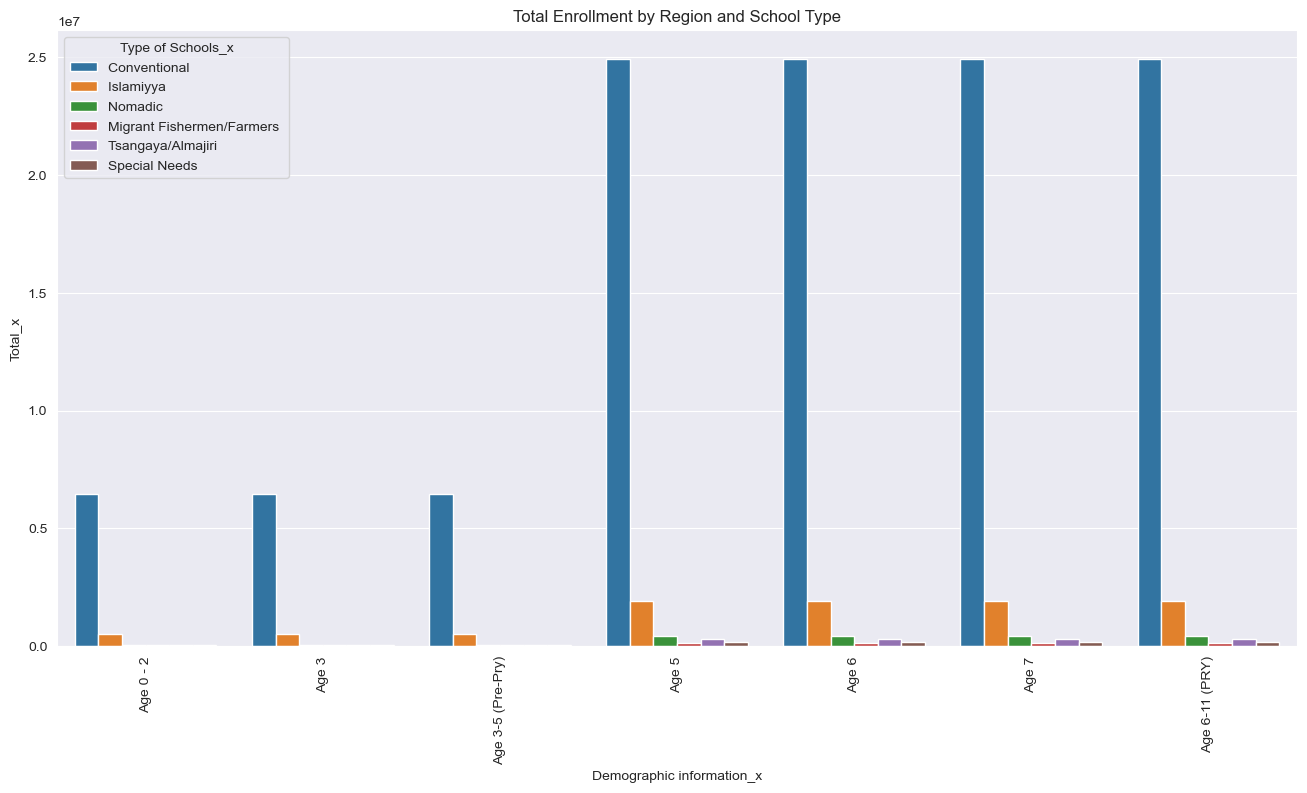

In [25]:
# Plot total enrollment by region and age category
plt.figure(figsize=(16,8))
sns.barplot(x='Demographic information_x', y='Total_x', hue='Type of Schools_x', data=merged)
plt.xticks(rotation=90)
plt.title('Total Enrollment by Region and School Type')
plt.show()

In [26]:
# Enrollment by Region and Age:
#plt.figure(figsize=(12, 6))
#sns.barplot(data=merged, x='Region', y='Enrollment', hue='Age Category')
#plt.title('Enrollment by Region and Age Category')
#plt.xticks(rotation=45)
#plt.show()

In [27]:
# Teacher-to-Student Ratio
#merged['Teacher_Student_Ratio'] = merged['Total Teachers'] / merged['Total Enrollment']
#sns.boxplot(data=merged, x='Region', y='Teacher_Student_Ratio')
#plt.title('Teacher-to-Student Ratio by Region')
#plt.xticks(rotation=45)
#plt.show()

### Machine Learning for Predictions
We'll now build models to predict key outcomes:

Predicting Dropout Rates: We can build a regression model to predict dropout rates in different regions. We'll use features like enrollment, teacher data, and infrastructure.
Predicting Future Demand for Educational Materials: We can predict the future demand for textbooks based on current enrollment data.
Predicting Teacher Shortages: We'll build a model to forecast teacher shortages and identify regions requiring teacher training.

### Handle Categorical Variables:
Encode categorical variables such as Sub-Schools and Type of Schools into numerical values using techniques like one-hot encoding or label encoding.

In [29]:
# Map 'Sub-Schools' to numeric values (Example mapping: you can define based on your dataset)
sub_schools_mapping = {
    "ECCDE/Pre-Primary": 0.0,
    "Primary": 1.0,
    "JSS": 2.0
}
merged["Sub-Schools"] = merged["Sub-Schools"].map(sub_schools_mapping)

In [31]:
# Map 'Demographic information_y' to numeric values (Example mapping: you can define based on your dataset)
demo_info_mapping = {
    "Age 0 - 2": 0.0,
    "Age 3": 0.0,
    "Age 3 - 5(Pre-Pry)": 1.0,
    "Age 5": 2.0,
    "Age 6 ": 2.0,
    "Age 7": 2.0,
    "Age 7 - 11(PRY)": 2.0,
    "Age 11": 3.0,
    "Age 12": 3.0,
    "Age 12 - 14(JSS)": 4.0,
    "Age 14": 5.0,
    "Age 15": 5.0,
    "Age 15 and above": 5.0
}
merged["Demographic information_y"] = merged["Demographic information_y"].map(demo_info_mapping)

In [32]:
merged.head()

,Sub-Schools,Type of Schools_x,Male_x,Female_x,Total_x,North Central_x,North East_x,North West_x,South East_x,South South_x,...,South West_y,Demographic information_y,Type of Schools_y,Total,North Central,North East,North West,South East,South South,South West
0,0.0,Conventional,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,0.0,Conventional,45878,8319,2149,3162,5848,7848,18552
1,0.0,Conventional,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,0.0,Special Needs,241,53,40,29,22,45,52
2,0.0,Conventional,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,0.0,Nomadic,35,5,1,11,4,6,8
3,0.0,Conventional,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,0.0,Migrant Fishermen/Farmers,17,2,3,1,4,4,3
4,0.0,Conventional,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,0.0,Islamiyya,1904,333,408,823,1,8,331


In [33]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
merged['Sub-Schools'] = label_encoder.fit_transform(merged['Sub-Schools'])
merged['Type of Schools_x'] = label_encoder.fit_transform(merged['Type of Schools_x'])
merged['Type of Schools_y'] = label_encoder.fit_transform(merged['Type of Schools_y'])
merged['Demographic information_y'] = label_encoder.fit_transform(merged['Demographic information_y'])

# Verify the changes
merged.head()

,Sub-Schools,Type of Schools_x,Male_x,Female_x,Total_x,North Central_x,North East_x,North West_x,South East_x,South South_x,...,South West_y,Demographic information_y,Type of Schools_y,Total,North Central,North East,North West,South East,South South,South West
0,0,0,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,0,0,45878,8319,2149,3162,5848,7848,18552
1,0,0,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,0,7,241,53,40,29,22,45,52
2,0,0,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,0,6,35,5,1,11,4,6,8
3,0,0,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,0,5,17,2,3,1,4,4,3
4,0,0,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,4.063681e+06,0,3,1904,333,408,823,1,8,331


In [34]:
# Drop irrelevant or redundant columns
columns_to_drop = ['Demographic information_y', 'Type of Schools_y']  # Adjust as needed
merged = merged.drop(columns=columns_to_drop, errors='ignore')
merged.head(1)

,Sub-Schools,Type of Schools_x,Male_x,Female_x,Total_x,North Central_x,North East_x,North West_x,South East_x,South South_x,...,South East_y,South South_y,South West_y,Total,North Central,North East,North West,South East,South South,South West
0,0,0,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,...,2.313476e+06,2.809582e+06,4.063681e+06,45878,8319,2149,3162,5848,7848,18552


In [38]:
# Selecting relevant features for machine learning
selected_features = [
    'Male_x', 'Female_x', 'Total_x',
    'North Central_x', 'North East_x', 'North West_x',
    'South East_x', 'South South_x', 'South West_y','Sub-Schools', 'Type of Schools_x'
]

### Feature Scaling:
Scale numerical features

In [39]:
merged = merged[selected_features]
merged.head(1)

,Male_x,Female_x,Total_x,North Central_x,North East_x,North West_x,South East_x,South South_x,South West_y,Sub-Schools,Type of Schools_x
0,3289081,3179945,6469026,852650,475184,1245128,1036354,1186739,4.063681e+06,0,0


In [40]:
# Split the dataset for training and testing (if required)
X = merged.drop('Total_x', axis=1)  # Replace with your target column
y = merged['Total_x']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling numerical features
#scaler = StandardScaler()  # or MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [41]:
# Scaling numerical features
scaler = StandardScaler() 
X = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Predicting Enrolments
We need to create a target variable for dropout rates. If this data is not available, we can use features like Total_x and Total_y (enrollment) to estimate dropouts. If dropout data is available, we'd use it as the target variable.

In [43]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2_Score: {r2}")

Mean Squared Error: 0.0
R2_Score: 1.0


In [44]:
# Save the model
with open('enrollment_prediction_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved successfully.")

Model saved successfully.


In [45]:
# Load the saved pickle file
with open("enrollment_model.pkl", "rb") as file:
    loaded_enrolment = pickle.load(file)

print("Enrolment_m loaded successfully.")

Enrolment_m loaded successfully.


In [ ]:
# Save the final merged dataset to a CSV file
#merged.to_csv("cleaned_education_data.csv", index=False)
#print("Datasets have been merged and saved to 'final_merged_data.csv'")

In [ ]:
#pickle.dump(ridge_model, open('House_price_mod.pkl', 'wb'))
#LLoad the model from pickle file
#House_price = pickle.load(open('House_price_mod.pkl', 'rb'))

In [ ]:
#LLoad the model from pickle file
#House_price = pickle.load(open('House_price_mod.pkl', 'rb'))

In [ ]:
# Save model and scaler
#with open("enrollment_model.pkl", "wb") as f:
    #pickle.dump({"model": rf_model, "scaler": scaler}, f)
#print("Model saved successfully.")

In [ ]:
# Load the saved pickle file
#with open("enrollment_model.pkl", "rb") as file:
    #loaded_enrolment = pickle.load(file)

#print("Enrolment_m loaded successfully.")

In [ ]:
# loaded_enrolment.predict([[0.390097,	0.418763,	0.403889,	0.449192,	0.020606,	0.033418,	0.847668,	0.733693,	0.642937,	-1.333333,	-1.46385]])

In [ ]:
# Assuming you saved the model with joblib
loaded_enrolment = joblib.load('enrollment_model.pkl')

# Check if it is indeed a model, not a dictionary
print(type(loaded_enrolment))

In [ ]:
# Assuming the model is stored in a key 'model' within the dictionary
model = loaded_enrolment['model']

# Now you can use the predict method
prediction = model.predict([[0.390097, 0.418763, 0.449192, 0.020606, 0.033418, 0.847668, 0.733693, 0.642937, -1.333333, -1.46385]])
prediction

In [ ]:
# Load the model from a pickle file
#with open('enrollment_model.pkl', 'rb') as file:
    #loaded_model = pickle.load(file)

# Ensure the loaded object is the model, not a dictionary
#if isinstance(loaded_model, dict):
    # Access the model from the dictionary, e.g., if the model is under the 'model' key
    #model = loaded_model.get('rf_model')  # Or the actual key name used in your dictionary
#else:
    #model = loaded_model

# Now you can safely call the predict method
#prediction = model.predict([[0.390097, 0.418763, 0.403889, 0.449192, 0.020606, 0.033418, 0.847668, 0.733693, 0.642937, -1.333333, -1.46385]])

#print(prediction)

###  Observations

Enrollment:

The North-East and North-West regions show the lowest enrollment rates in ECCDE/Pre-Primary education.
Nomadic and special needs schools are significantly underrepresented.
Teacher Availability:

Regions like the South-West have higher proportions of qualified teachers compared to the North-East.
Infrastructure:

North-Central regions have better classroom conditions than North-East and North-West regions.
Community Engagement:

Limited special programs for Nomadic and Fisherfolk communities are observed.

### Recommendations
Resource Allocation:

Allocate more resources to regions with low teacher-student ratios and poor infrastructure.
Community Engagement:

Encourage community leaders to support special needs and nomadic schools.
Teacher Training:

Invest in teacher training programs, especially in underserved regions.
Technology Adoption:

Provide digital learning materials and remote education opportunities to bridge gaps.
Policy Formulation:

Develop region-specific education policies targeting unique community needs.

### Conclusion and Insights
Based on the predictions, we can identify regions with:

High dropout rates, which might require immediate intervention.
High demand for textbooks, suggesting the need for resource allocation.
Teacher shortages, helping to prioritize teacher training initiatives.
These insights align with the project's objectives to improve educational access, quality, and inclusivity by fostering community engagement and targeting resources effectively.